# Polyethylene (mapping 4->1)

Coarse-graining: four united-atoms into a single CG bead


In [4]:
import os
from matplotlib import pyplot as plt
from pylab import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from collections import defaultdict
sns.set(style='ticks', palette='Set2')
dt = 0.001

def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError("smooth only accepts 1 dimension arrays.")
        if x.size < window_len:
                raise ValueError("Input vector needs to be bigger than window size.")
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

rcParams['figure.figsize'] = 17, 8
orig_values = {x: v for x, v in rcParams.items() if 'size' in x}
rcParams.update({'font.size': 12, 
                 'legend.fontsize': 16, 
                 'axes.titlesize': 16,
                 'axes.labelsize': 16,
                 'xtick.labelsize': 12, 
                 'ytick.labelsize': 12,
                 })
res2color = {
    0.00001: 0,
    0.00002: 1,
    0.00003: 2,
    0.00004: 3,
    0.00005: 4,
    0.00006: 19,
    0.00008: 5,
    0.00009: 15,
    0.0001: 6,
    0.0002: 7,
    0.0003: 8,
    0.0004: 9,
    0.0005: 10,
    0.0007: 17,
    0.0008: 11,
    0.0009: 16,
    0.001: 12,
    0.002: 14,
    'aa': 13
    }

plot_colors = np.array([
    (197,27,125),
    (31, 120, 180),
    (178, 223, 138),
    (51, 160, 44),
    (251, 154, 153),
    (227, 26, 28),  # 5
    (253, 191, 111),
    (255, 127, 0),
    (202, 178, 214),
    (106, 61, 154),
    (166,86,40), # 10
    (177, 89, 40), ## color palet 
    (57, 106, 177), 
    (118,42,131), # 13
    (104, 37, 41), 
    (83, 81, 84), 
    (107, 76, 154),
    (146, 36, 40),
    (148, 139, 61),
    (137, 61, 57),
    ]) / 255.0
fonttitle=16
fontother=12

res_cols = {'Ekin': 3,
 'T': 2,
 'angle_252': 12,
 'angle_252_cross': 11,
 'angle_253_cross': 10,
 'bond_124': 9,
 'bond_124_cross': 8,
 'bond_125_cross': 7,
 'dihedral_190': 14,
 'dihedral_190_cross': 13,
 'dihedral_191_cross': 15,
 'lj': 5,
 'lj-14_0': 17,
 'lj-14_1': 16,
 'lj-14_1_cross': 18,
 'lj-tab': 6,
 'res': 4,
 'step': 0,
 'time': 1,
 'Epot': (5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18),
 'bonds': (7, 8, 9),
 'angles': (10, 11, 12),
 'dihedrals': (13, 14, 15),
 'lj-14': (16, 17, 18),
 'LJ': (5, 6, 16, 17, 18)
}

ref_cols = {'Ekin': 3,
 'P': 10,
 'T': 2,
 'angle_252': 6,
 'bond_124': 5,
 'dihedral_190': 7,
 'lj': 4,
 'lj-14_0': 8,
 'lj-14_1': 9,
 'LJ': (4, 8, 9),
 'step': 0,
 'time': 1,
 'Epot': (4, 5, 6, 7, 8, 9)}


In [5]:
test2res = {'test_1': 1e-5, 'test_2': 2*1e-5}

In [6]:
all_res_data = {f: np.loadtxt(os.path.join('speed_data/new', f), skiprows=1) 
            for f in os.listdir('speed_data/new') if 'sim' in f}
ref_data = [
    np.loadtxt(os.path.join('speed_data', f), skiprows=1) 
    for f in os.listdir('speed_data/') if 'ref' in f]

In [7]:
ref_data = np.average(ref_data, axis=0)

In [8]:
ref_data.shape

(10000, 11)

In [9]:
res_data = {}
for f in all_res_data:
    if f not in res_data:
        res_data[f] = []
    res_data[f].append(all_res_data[f])

In [10]:
avg_res_data, std_res_data = {}, {}  # indexed by alpha value
for f in res_data:
    t = '_'.join(f.replace('.csv', '').split('_')[2:])
    r = float(t.split('_')[0])
    res_data[f] = np.array(res_data[f])
    avg_res_data[r] = np.average(res_data[f], axis=0)

In [11]:
avg_res_data.keys()

dict_keys([1e-05, 2e-05])

In [12]:
avg_res_data[2e-05].shape

(49056, 19)

In [18]:
%matplotlib inline

# Potential energy

In [13]:
ref_epot = np.sum(ref_data[:, ref_cols['Epot']], axis=1)

In [15]:
res_epot = {}
res_time = {}
for r in avg_res_data:
    res_epot[r] = np.sum(avg_res_data[r][:, res_cols['Epot']], axis=1)
    res_time[r] = avg_res_data[r][:, 1]

In [16]:
RT = 8.314 * 423.0 * 10**-3


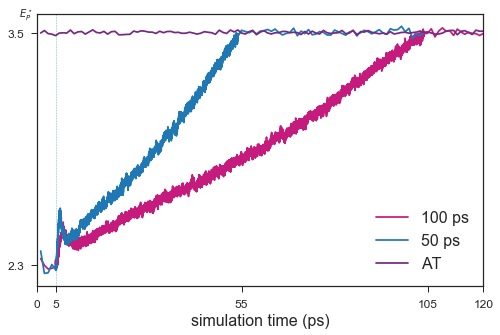

In [86]:
#plt.ylim([90000, 92500])
rcParams['figure.figsize'] = 8, 5
plt.annotate(r'$E_P^\star$',  xy=(-0.01, 0.99),  xycoords='axes fraction', horizontalalignment='right')

yticks = [
    np.average(ref_epot/(RT*7500.0)),
    np.average(res_epot[1e-05][1:5]/(RT*7500.0))]

plt.axvline(x=5.0, linewidth=0.5, linestyle='--')
plt.plot(res_time[1e-05], res_epot[1e-05]/(RT*7500.0), label='100 ps', color=plot_colors[res2color[0.00001]])
plt.plot(res_time[2e-05], res_epot[2e-05]/(RT*7500.0), label='50 ps', color=plot_colors[res2color[0.00002]])
plt.plot(ref_data[:, 1], ref_epot/(RT*7500.0), label='AT', color=plot_colors[res2color['aa']])
plt.xlabel('simulation time (ps)')
plt.yticks(yticks, map(r'{:.1f}'.format, yticks))
plt.legend(loc=0) #, title=r'$\Delta t / \alpha$', fontsize=fontother)
plt.xticks([0, 5, 55, 105, 120])
plt.xlim([0, 120])
plt.savefig('pe4_energy.pdf', dpi=300, bbox_inches='tight')

## Average potential energy

The reference value of energy per segment

In [21]:
avg_ep = np.average(ref_epot/(RT*7500.0))
std_ep = np.std(ref_epot/(RT*7500.0))


In [176]:
data_50ps = np.loadtxt('speed_data/test_1_energy.csv', skiprows=1)
data_100ps = np.loadtxt('speed_data/test_2_energy.csv', skiprows=1)

In [177]:
ep_50ps = np.sum(data_50ps[:, (4, 5, 6, 7, 8, 9)], axis=1)
ep_100ps = np.sum(data_100ps[:, (4, 5, 6, 7, 8, 9)], axis=1)

In [178]:
avg_ep_50ps = np.average(ep_50ps/(RT*7500.0))
std_ep_50ps = np.std(ep_50ps/(RT*7500.0))
print avg_ep_50ps, std_ep_50ps

3.45782399435 0.0155936911905


In [179]:
avg_ep_100ps = np.average(ep_100ps/(RT*7500.0))
std_ep_100ps = np.std(ep_100ps/(RT*7500.0))
print avg_ep_100ps, std_ep_100ps

3.45932814763 0.0157818439041


# Supportive information

In [180]:
rcParams['figure.figsize'] = 10, 5

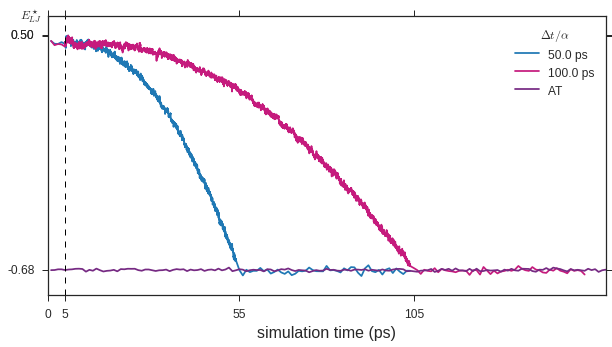

In [181]:
rcParams['figure.figsize'] = 10, 5

# LJ
yticks = []
max_y = 0.0
plt.annotate(r'$E_{LJ}^\star$', 
             xy=(-0.01, 0.99), 
             xycoords='axes fraction', 
             horizontalalignment='right')
for r in avg_res_data:
    data = np.sum(avg_res_data[r][:, res_cols['LJ']], axis=1) / (RT*7500.0)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{} ps'.format(dt/r))
    yticks.append(max(max_y, np.nanmax(data)))
ref_data_lj = np.sum(ref_data[:, ref_cols['LJ']][200:400] / (RT*7500.0), axis=1)

yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )
plt.axvline(x=5.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xlim(xmax=160)
#plt.ylim([-6, 1])
plt.xticks([0.0, 5.0, 5.0+dt/0.00001, 5+dt/0.00002])
plt.xlabel('simulation time (ps)')
plt.legend(
    fontsize=fontother, frameon=False,
    bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', title=r'$\Delta t / \alpha$')
plt.savefig('pe4_lj_change.pdf', dpi=300, bbox_inches='tight')

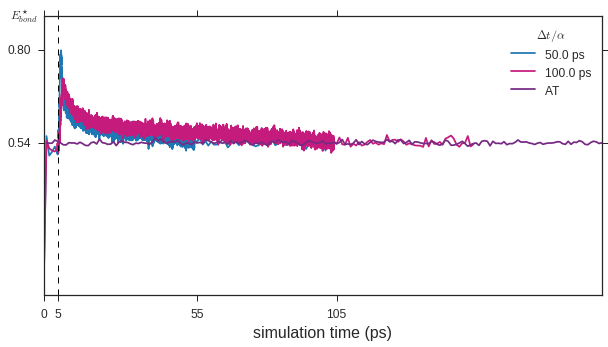

In [182]:
# Bond
yticks = []
plt.annotate(r'$E_{bond}^\star$', 
             xy=(-0.01, 0.99), 
             xycoords='axes fraction', 
             horizontalalignment='right')
max_y = 0.0
increase_min_max = []
for r in avg_res_data:
    data = np.sum(avg_res_data[r][:, res_cols['bonds']], axis=1)  / (RT*7500.0)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{} ps'.format(dt/r))
    increase_min_max.append([r, np.max(data) - np.min(data)])
    max_y = max(max_y, np.nanmax(data))
    
yticks.append(max_y)

ref_data_lj = ref_data[:, ref_cols['bond_124']][200:400] / (RT*7500.0)
yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT')

plt.axvline(x=5.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xticks([0.0, 5.0, 5.0+dt/0.00001, 5+dt/0.00002])
plt.xlabel('simulation time (ps)')
plt.legend(fontsize=fontother, bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', 
           frameon=False, title=r'$\Delta t / \alpha$')
plt.savefig('pe4_bond_change.pdf', dpi=300, bbox_inches='tight')

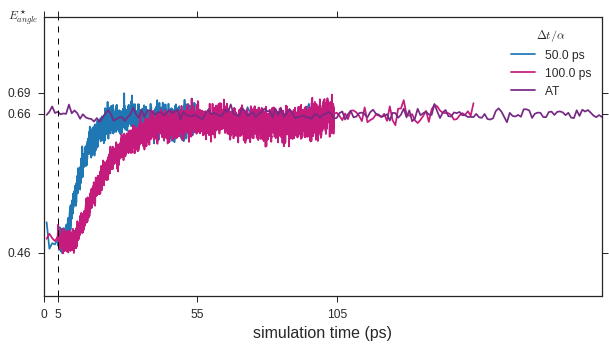

In [183]:
# Angle
yticks = []
plt.annotate(r'$E_{angle}^\star$', 
             xy=(-0.01, 0.99), 
             xycoords='axes fraction', 
             horizontalalignment='right')
max_y = 0.0
min_y = 1000.0
for r in avg_res_data:
    data = np.sum(avg_res_data[r][:, res_cols['angles']], axis=1) / (RT*7500.0)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{} ps'.format(dt/r))
    max_y = max(max_y, np.nanmax(data))
    min_y = min(min_y, np.nanmin(data))
    
yticks.append(max_y)
yticks.append(min_y)

ref_data_lj = ref_data[:, ref_cols['angle_252']][200:400] / (RT*7500.0)
yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )

plt.axvline(x=5.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xticks([0.0, 5.0, 5.0+dt/0.00001, 5.0+dt/0.00002])
plt.xlabel('simulation time (ps)')
plt.ylim([0.4, 0.8])
lgd = plt.legend(fontsize=fontother, ncol=1, loc='best', frameon=False, title=r'$\Delta t / \alpha$')
plt.savefig('pe4_angle_change.pdf', dpi=300, bbox_inches='tight')

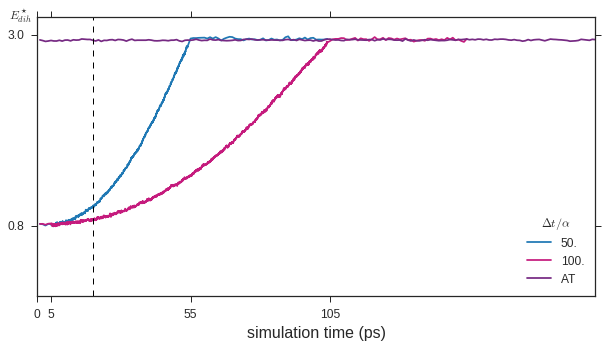

In [184]:
# Dihedral
yticks = []
plt.annotate(r'$E_{dih}^\star$', 
             xy=(-0.01, 0.99), 
             xycoords='axes fraction', 
             horizontalalignment='right')
max_y = 0.0
min_y = 1000.0
for r in avg_res_data:
    data = np.sum(avg_res_data[r][:, res_cols['dihedrals']], axis=1) / (RT*7500.0)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{}'.format(dt/r).rstrip('0'))
    max_y = max(max_y, np.nanmax(data))
    min_y = min(min_y, np.nanmin(data))
    
yticks.append(max_y)
yticks.append(min_y)

ref_data_lj = ref_data[:, ref_cols['dihedral_190']][200:400] / (RT*7500.0)
yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )

plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks([0.8, 2.99], map('{:.1f}'.format, [0.8, 2.99]))
plt.xticks([0.0, 5.0, 5.0+dt/0.00001, 5.0+dt/0.00002])
plt.xlabel('simulation time (ps)')
plt.ylim([0.0, 3.2])
lgd = plt.legend(fontsize=fontother, ncol=1, loc='best', frameon=False, title=r'$\Delta t / \alpha$')
plt.savefig('pe4_dih_change.pdf', dpi=300, bbox_inches='tight')

In [185]:
cg_dir = 'cg_ibi/'
cg_files = {f: np.loadtxt(os.path.join(cg_dir, f), usecols=(0, 1)) for f in os.listdir(cg_dir)}

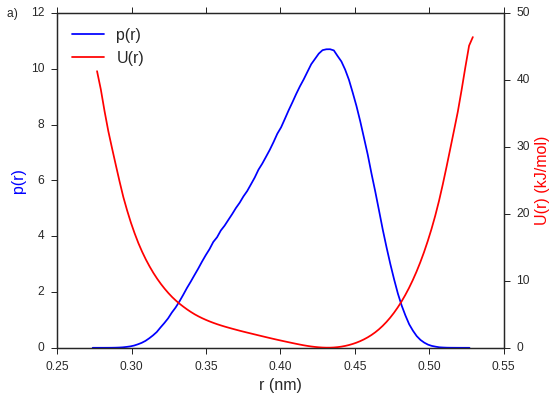

In [186]:
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['bond.hist'][:, 0], cg_files['bond.hist'][:, 1], 'b', label='p(r)')
ax1.set_xlabel('r (nm)')
ax1.set_ylabel('p(r)', color='b')

ax1.annotate(r'a) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

# And plot the potential
ax2 = ax1.twinx()
lns2 = ax2.plot(cg_files['bond.pot'][:, 0], cg_files['bond.pot'][:, 1], 'r', label='U(r)')
ax2.set_ylabel('U(r) (kJ/mol)', color='r')

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2)
fig.savefig('pe4_cg_ibi_bonded.pdf', dpi=300, bbox_inches='tight')

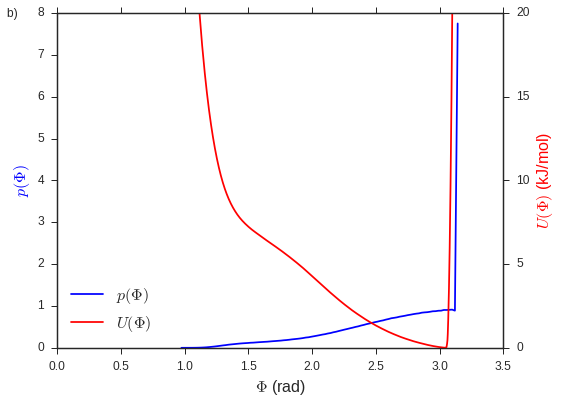

In [187]:
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['angle.hist'][:, 0], cg_files['angle.hist'][:, 1], 'b', label=r'$p(\Phi)$')
ax1.set_xlabel(r'$\Phi$ (rad)')
ax1.set_ylabel(r'$p(\Phi)$', color='b')

ax1.annotate(r'b) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

# And plot the potential
ax1b = ax1.twinx()
lns2 = ax1b.plot(np.deg2rad(cg_files['table_a1.xvg'][:, 0]), cg_files['table_a1.xvg'][:, 1], 'r', label=r'$U(\Phi)$')
ax1b.set_ylim([0, 20])
ax1b.set_ylabel(r'$U(\Phi)$ (kJ/mol)', color='r')

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1b.legend(lns, labs, loc=3)

fig.savefig('pe4_cg_ibi_angles.pdf', dpi=300, bbox_inches='tight')

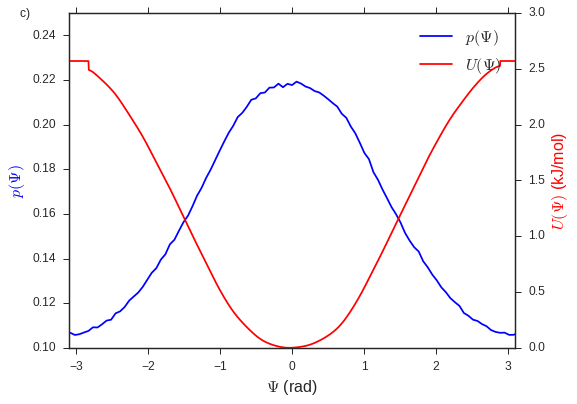

In [188]:
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['dihedral.hist'][:, 0], cg_files['dihedral.hist'][:, 1], 'b', label=r'$p(\Psi)$')
ax1.set_xlabel(r'$\Psi$ (rad)')
ax1.set_ylabel(r'$p(\Psi)$', color='b')
ax1.set_ylim([0.1, 0.25])

ax1.annotate(r'c) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

# And plot the potential
ax1b = ax1.twinx()
lns2 = ax1b.plot(np.deg2rad(cg_files['table_d1.xvg'][:, 0]), cg_files['table_d1.xvg'][:, 1], 'r', label=r'$U(\Psi)$')
ax1b.set_ylim([0, 3])
ax1b.set_xlim([-3.1, 3.1])
ax1b.set_ylabel(r'$U(\Psi)$ (kJ/mol)', color='r')

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1b.legend(lns, labs, loc=1)

fig.savefig('pe4_cg_ibi_dih.pdf', dpi=300, bbox_inches='tight')

#### non bonded terms

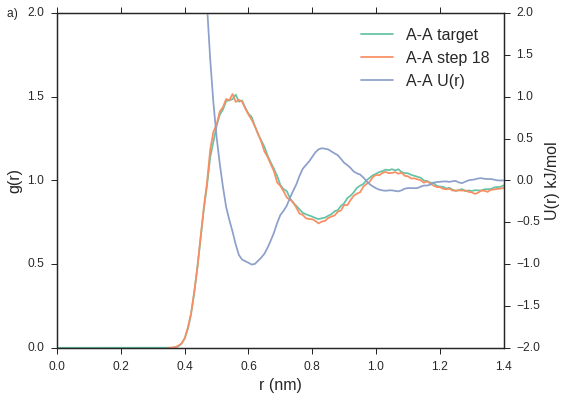

In [189]:
import itertools
plt.rcParams['figure.figsize'] = (8, 6)
palette = itertools.cycle(sns.color_palette())
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['A-A.dist.tgt'][:, 0], cg_files['A-A.dist.tgt'][:, 1], color=next(palette), 
                label='A-A target')
lns2 = ax1.plot(cg_files['A-A.dist.new'][:, 0], cg_files['A-A.dist.new'][:, 1], color=next(palette), 
                label='A-A step 18')
ax1.set_xlim([0.0, 1.4])
ax1.set_ylim([0.0, 2.0])
ax1.set_ylabel('g(r)')
ax1.set_xlabel('r (nm)')

ax1.annotate(r'a) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

ax2 = ax1.twinx()
lns3 = ax2.plot(cg_files['A-A.pot.new'][:, 0], cg_files['A-A.pot.new'][:, 1], color=next(palette), 
                label='A-A U(r)')
ax2.set_ylabel('U(r) kJ/mol')
ax2.set_ylim([-2, 2])
ax2.set_xlim([0.0, 1.4])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)
fig.savefig('pe4_cg_ibi_A_A.pdf', dpi=300, bbox_inches='tight')

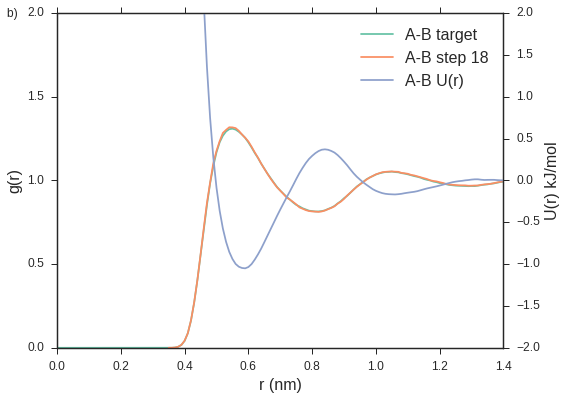

In [190]:
import itertools
plt.rcParams['figure.figsize'] = (8, 6)
palette = itertools.cycle(sns.color_palette())
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['A-B.dist.tgt'][:, 0], cg_files['A-B.dist.tgt'][:, 1], color=next(palette), 
                label='A-B target')
lns2 = ax1.plot(cg_files['A-B.dist.new'][:, 0], cg_files['A-B.dist.new'][:, 1], color=next(palette), 
                label='A-B step 18')
ax1.set_xlim([0.0, 1.4])
ax1.set_ylim([0.0, 2.0])
ax1.set_ylabel('g(r)')
ax1.set_xlabel('r (nm)')

ax1.annotate(r'b) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

ax2 = ax1.twinx()
lns3 = ax2.plot(cg_files['A-B.pot.new'][:, 0], cg_files['A-B.pot.new'][:, 1], color=next(palette), 
                label='A-B U(r)')
ax2.set_ylabel('U(r) kJ/mol')
ax2.set_ylim([-2, 2])
ax2.set_xlim([0.0, 1.4])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)
fig.savefig('pe4_cg_ibi_A_B.pdf', dpi=300, bbox_inches='tight')

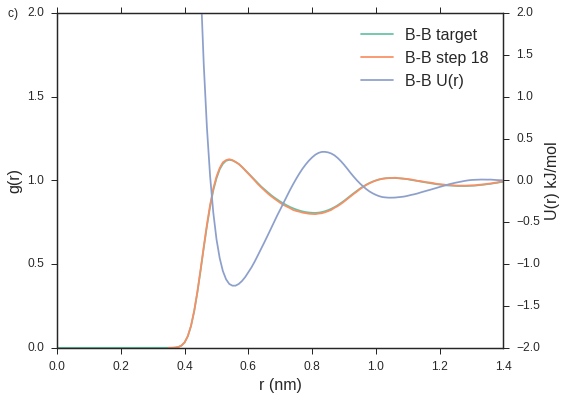

In [191]:
import itertools
plt.rcParams['figure.figsize'] = (8, 6)
palette = itertools.cycle(sns.color_palette())
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['B-B.dist.tgt'][:, 0], cg_files['B-B.dist.tgt'][:, 1], color=next(palette), 
                label='B-B target')
lns2 = ax1.plot(cg_files['B-B.dist.new'][:, 0], cg_files['B-B.dist.new'][:, 1], color=next(palette), 
                label='B-B step 18')
ax1.set_xlim([0.0, 1.4])
ax1.set_ylim([0.0, 2.0])
ax1.set_ylabel('g(r)')
ax1.set_xlabel('r (nm)')

ax1.annotate(r'c) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

ax2 = ax1.twinx()
lns3 = ax2.plot(cg_files['B-B.pot.new'][:, 0], cg_files['B-B.pot.new'][:, 1], color=next(palette), 
                label='B-B U(r)')
ax2.set_ylabel('U(r) kJ/mol')
ax2.set_ylim([-2, 2])
ax2.set_xlim([0.0, 1.4])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)
fig.savefig('pe4_cg_ibi_B_B.pdf', dpi=300, bbox_inches='tight')

# Bonded terms

In [26]:
def ih_norm(ih):
    dx = np.diff(ih[:, 0])[0]
    s = np.sum(dx*ih[:, 1])
    ih[:, 1] /= s
    return ih

In [27]:
res_bonds1 = ih_norm(np.loadtxt('structural_data/test_1_bond_1_2.hist'))
res_bonds2 = ih_norm(np.loadtxt('structural_data/test_2_bond_1_2.hist'))
ref_bonds = ih_norm(np.loadtxt('structural_data/ref_bond_1_2.hist'))


res_angles1 = ih_norm(np.loadtxt('structural_data/test_1_angle_1_2_3.hist'))
res_angles2 = ih_norm(np.loadtxt('structural_data/test_2_angle_1_2_3.hist'))
ref_angles = ih_norm(np.loadtxt('structural_data/ref_angle_1_2_3.hist'))

res_dih1 = ih_norm(np.loadtxt('structural_data/test_1_torsion_1_2_3_4.hist'))
res_dih2 = ih_norm(np.loadtxt('structural_data/test_2_torsion_1_2_3_4.hist'))
ref_dih = ih_norm(np.loadtxt('structural_data/ref_torsion_1_2_3_4.hist'))

res_rdf1 = np.loadtxt('structural_data/A-A.dist.test_1', usecols=(0, 1))
res_rdf2 = np.loadtxt('structural_data/A-A.dist.test_2', usecols=(0, 1))
ref_rdf = np.loadtxt('structural_data/A-A.dist.ref', usecols=(0, 1))

In [29]:
dx = np.diff(res_angles1[:, 0])[0]
s = np.sum(dx*res_angles1[:, 1])
yy = res_angles1[:, 1]/s
s = np.sum(dx*yy)


In [30]:
rdf_dir = 'structural_data/rdf'
rdf_data = defaultdict(list)
for f in os.listdir(rdf_dir):
    d = np.loadtxt(os.path.join(rdf_dir, f), usecols=(0, 1))
    if f.startswith('ref'):
        rdf_data['aa'].append(d)
    else:
        t = '_'.join(f.split('_')[:2])
        r = test2res[t]
        rdf_data[r].append(d)

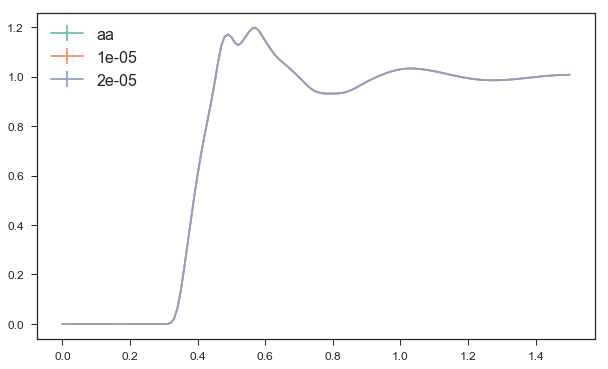

In [31]:
avg_rdf_data = {}
std_rdf_data = {}
for r in rdf_data:
    avg_rdf_data[r] = np.average(rdf_data[r], axis=0)
    std_rdf_data[r] = np.std(rdf_data[r], axis=0)
    plt.errorbar(avg_rdf_data[r][:, 0], avg_rdf_data[r][:, 1], std_rdf_data[r][:, 1], label=r)
plt.legend()

In [33]:
x_argmax, y_argmax = np.argmax(avg_rdf_data[r], axis=0)


## Structural information

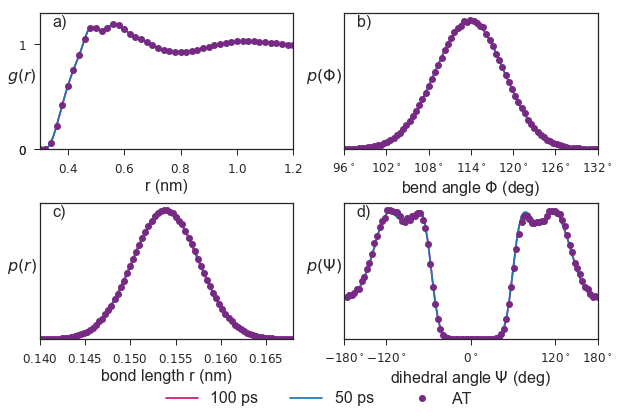

In [89]:
rcParams['figure.figsize'] = 10, 6
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.2, hspace=0.4)
ax1 = fig.add_subplot(gs1[0, 0]) # rdf
ax2 = fig.add_subplot(gs1[1, 0]) # bonds
ax3 = fig.add_subplot(gs1[0, 1]) # angles
ax4 = fig.add_subplot(gs1[1, 1])# dih

# RDF
an_1 = ax1.annotate(r'$g(r)$', xy=(-0.01, 0.5),  xycoords='axes fraction', 
                    fontsize=fonttitle, horizontalalignment='right')
an_11 = ax1.annotate('a)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
for r in avg_rdf_data:
    if r == 'aa':
        continue
    lbl = '{:0f}'.format(dt / r)
    ax1.plot(avg_rdf_data[r][:, 0], avg_rdf_data[r][:, 1], color=plot_colors[res2color[r]])
ax1.plot(avg_rdf_data['aa'][:, 0],
         avg_rdf_data['aa'][:, 1], 'o', color=plot_colors[res2color['aa']], markevery=2)
ax1.set_xlim([0.3, 1.2])
ax1.set_ylim([0.0, 1.3])
ax1.set_yticks([0,0, 1.0])
# ax1.set_xticks([0.3, 0.57, 1.2])
ax1.set_xticklabels(map(r'${:.1f}$'.format, ax1.get_xticks()))
ax1.set_yticklabels(map(r'${:.0f}$'.format, ax1.get_yticks()))
ax1.set_xlabel(r'r (nm)')


# Bonds
an_2 = ax2.annotate(r'$p(r)$', xy=(-0.01, 0.5),  xycoords='axes fraction', fontsize=fonttitle, 
                    horizontalalignment='right')
an_21 = ax2.annotate('c)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax2.plot(res_bonds1[:, 0], res_bonds1[:, 1], label='100 ps', color=plot_colors[res2color[0.00001]])
ax2.plot(res_bonds2[:, 0], res_bonds2[:, 1], label='50 ps', color=plot_colors[res2color[0.00002]])
ax2.plot(ref_bonds[:, 0], ref_bonds[:, 1], 'o', label='AT', color=plot_colors[res2color['aa']])
ax2.set_xlim(0.140, 0.168)
ax2.set_ylim(ymin=0)
ax2.tick_params(axis='both', which='major')
ax2.set_yticks([])
ax2.set_xlabel(r'bond length r (nm)')
# ax2.set_xticks([0.154])
ax2.set_yticklabels(map(r'${:.0f}$'.format, ax2.get_yticks()))
ax2.set_xticklabels(map(r'${:.3f}$'.format, ax2.get_xticks()))

# Angles
an_3 = ax3.annotate(r'$p(\Phi)$', xy=(-0.01, 0.5),  
                    xycoords='axes fraction', fontsize=fonttitle, horizontalalignment='right')
an_31 = ax3.annotate('b)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax3.plot(res_angles1[:, 0], res_angles1[:, 1], label='100 ps', color=plot_colors[res2color[0.00001]])
ax3.plot(res_angles2[:, 0], res_angles2[:, 1], label='50 ps', color=plot_colors[res2color[0.00002]])
ax3.plot(ref_angles[:, 0], ref_angles[:, 1], 'o', label='AT', color=plot_colors[res2color['aa']])
ax3.set_yticks([])
ax3.set_xlim([96, 130])
ax3.set_ylim(ymin=0)
ax3.set_xticks(range(96, 133, 6))
ax3.tick_params(axis='both', which='major')
ax3.set_yticklabels(map(r'${}$'.format, ax3.get_yticks()))
ax3.set_xticklabels(map(r'${}^\circ$'.format, ax3.get_xticks()))
ax3.set_xlabel(r'bend angle $\Phi$ (deg)')

# Dihedrals
an_4 = ax4.annotate(r'$p(\Psi)$', xy=(-0.01, 0.5),  xycoords='axes fraction', 
                    fontsize=fonttitle, horizontalalignment='right')
an_41 = ax4.annotate('d)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax4.plot(res_dih1[:, 0], res_dih1[:, 1], label='100 ps', color=plot_colors[res2color[0.00001]])
ax4.plot(res_dih2[:, 0], res_dih2[:, 1], label='50 ps', color=plot_colors[res2color[0.00002]])
ax4.plot(ref_dih[:, 0], ref_dih[:, 1], 'o', label='AT', color=plot_colors[res2color['aa']])
ax4.set_yticks([])
ax4.set_xlim([-180, 180])
ax4.set_ylim(ymin=0)
ax4.set_xticks([-180, -120, 0, 120, 180])
ax4.tick_params(axis='both', which='major')
ax4.set_xticklabels(map(r'${}^\circ$'.format, ax4.get_xticks()))
ax4.set_yticklabels(map(r'${}$'.format, ax4.get_yticks()))
ax4.set_xlabel(r'dihedral angle $\Psi$ (deg)')

lgd = plt.legend(bbox_to_anchor=(-0.1, -0.6), ncol=5, loc='lower center', frameon=False)
plt.savefig('pe4_structure.pdf', bbox_extra_artists=[lgd, an_1, an_2, an_3, an_4], bbox_inches='tight')


# Rg, E-E, Internal distance

In [51]:
e_e, rg, internal = {'AT': [], 0.00001: [], 0.00002: []}, {'AT': [], 0.00001: [], 0.00002: []}, {'AT': [], 0.00001: [], 0.00002: []}

In [52]:
e_e['AT'] = [
    np.loadtxt(os.path.join('structural_data/', f)) for f in os.listdir('structural_data/') 
    if 'ref' in f and 'e_e' in f]

In [53]:
e_e[0.00001] = [
    np.loadtxt(os.path.join('structural_data/', f)) for f in os.listdir('structural_data/') 
    if 'test_1' in f and 'e_e' in f]

In [54]:
e_e[0.00002] = [
    np.loadtxt(os.path.join('structural_data/', f)) for f in os.listdir('structural_data/') 
    if 'test_2' in f and 'e_e' in f]

In [55]:
rcParams['figure.figsize'] = 10, 5
res2marker = {'AT': '*', 0.00001: 'v', 0.00002: 's'}

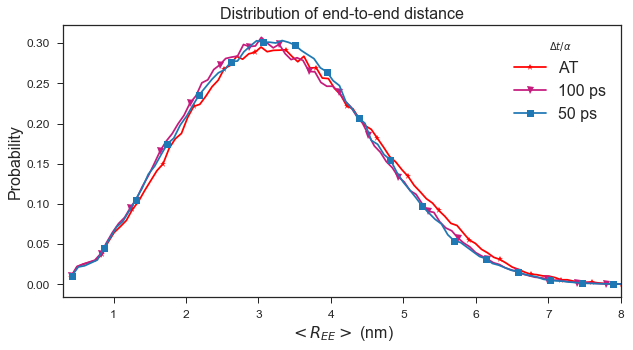

In [56]:
avg_ee = []
n, x = np.histogram(np.array([x for v in e_e['AT'] for x in v]), bins=100, density=True)
plt.plot(x[1:], n, '-*', color='red', label='AT', markevery=5)
avg_ee.append(np.average([x for v in e_e['AT'] for x in v]))
n, x = np.histogram(np.array([x for v in e_e[0.00001] for x in v]), bins=100, density=True)
plt.plot(x[1:], n, '-bv', color=plot_colors[res2color[0.00001]], label='100 ps', markevery=5)
avg_ee.append(np.average([x for v in e_e[0.00001] for x in v]))
n, x = np.histogram(np.array([x for v in e_e[0.00002] for x in v]), bins=100, density=True)
plt.plot(x[1:], n, '-gs', color=plot_colors[res2color[0.00002]], label='50 ps', markevery=5)
avg_ee.append(np.average([x for v in e_e[0.00002] for x in v]))
plt.legend(title=r'$\Delta t / \alpha$')
plt.xlim([0.3, 8.0])
plt.title('Distribution of end-to-end distance')
plt.ylabel('Probability')
plt.xlabel(r'$<R_{EE}>$ (nm)')
plt.savefig('pe4_e_e.pdf', bbox_inches='tight')

In [57]:
avg_rg = []
rg['AT'] = [
    np.loadtxt(os.path.join('structural_data/', f)) for f in os.listdir('structural_data/') 
    if 'ref' in f and 'rg' in f]

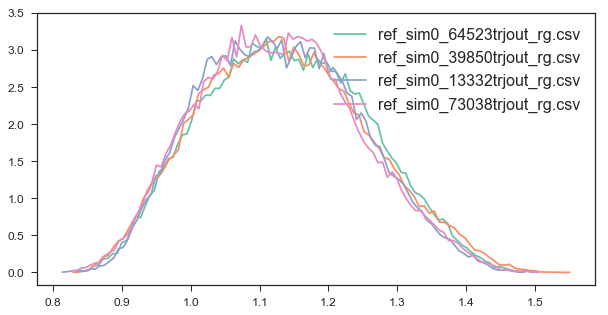

In [58]:
for f in os.listdir('structural_data'):
    if 'ref' in f and 'rg' in f:
        d = np.loadtxt(os.path.join('structural_data/', f))
        n, x = np.histogram(np.sqrt(d), bins=100, density=True)
        plt.plot(x[1:], n, label=f)
plt.legend()

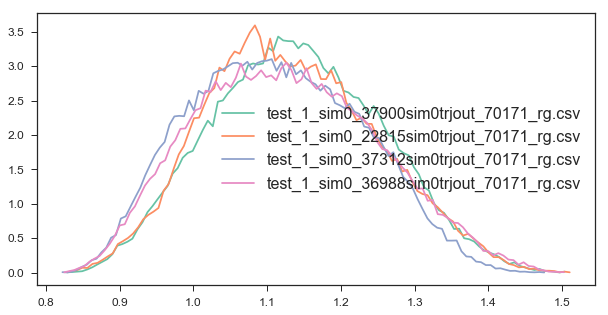

In [59]:
for f in os.listdir('structural_data'):
    if 'test_1' in f and 'rg' in f:
        d = np.loadtxt(os.path.join('structural_data/', f))
        n, x = np.histogram(np.sqrt(d), bins=100, density=True)
        plt.plot(x[1:], n, label=f)
plt.legend()

In [60]:
rg[0.00001] = [
    np.loadtxt(os.path.join('structural_data/', f)) for f in os.listdir('structural_data/') 
    if 'test_1' in f and 'rg' in f]

In [61]:
rg[0.00002] = [
    np.loadtxt(os.path.join('structural_data/', f)) for f in os.listdir('structural_data/') 
    if 'test_2' in f and 'rg' in f]

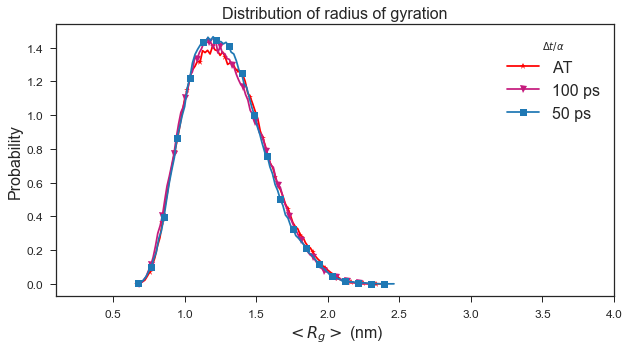

In [62]:
avg_rg = []
n, x = np.histogram(np.array([x for v in rg['AT'] for x in v]), bins=100, density=True)
plt.plot(x[1:], n, '-r*', label='AT', markevery=5)
avg_rg.append(np.average(np.array([x for v in rg['AT'] for x in v])))
n, x = np.histogram(np.array([x for v in rg[0.00001] for x in v]), bins=100, density=True)
plt.plot(x[1:], n, '-bv', color=plot_colors[res2color[0.00001]], label='100 ps', markevery=5)
avg_rg.append(np.average(np.array([x for v in rg[0.00001] for x in v])))
n, x = np.histogram(np.array([x for v in rg[0.00002] for x in v]), bins=100, density=True)
plt.plot(x[1:], n, '-gs', color=plot_colors[res2color[0.00002]], label='50 ps', markevery=5)
avg_rg.append(np.average(np.array([x for v in rg[0.00002] for x in v])))
plt.legend(title=r'$\Delta t / \alpha$')
plt.xlim([0.1, 4.0])
plt.title('Distribution of radius of gyration')
plt.ylabel('Probability')
plt.xlabel(r'$< R_g>$ (nm)')
plt.savefig('pe4_rg.pdf', bbox_inches='tight')

/home/teodor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


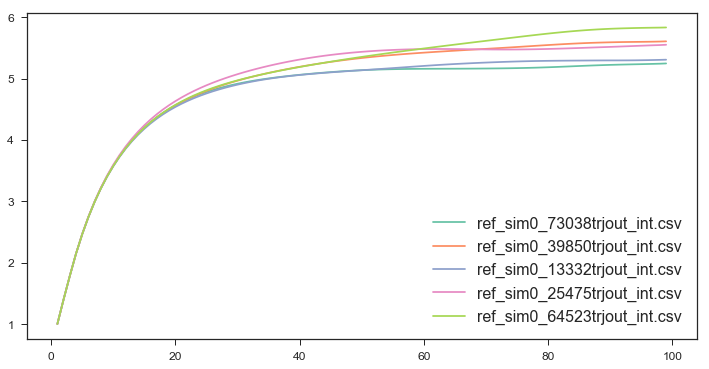

In [63]:
rcParams['figure.figsize'] = (12, 6)
internal['AT'] = []
for f in os.listdir('structural_data/'):
    if 'int' in f and 'ref' in f and f.endswith('csv'):
        data = np.loadtxt(os.path.join('structural_data/', f))
        internal['AT'].append(data)
        plt.plot(range(0, 100), data/(np.arange(0, 100, 1)*(0.154*0.154)), label=f)
plt.legend()

In [64]:
internal[0.00001] = []
internal[0.00002] = []
internal['AT'] = []
for f in os.listdir('structural_data/'):
    if 'int' in f and f.endswith('csv'):
        if 'test_1' in f:
            internal[0.00001].append(np.loadtxt(os.path.join('structural_data/', f)))
        elif 'test_2' in f:
            internal[0.00002].append(np.loadtxt(os.path.join('structural_data/', f)))
        else:
            internal['AT'].append(np.loadtxt(os.path.join('structural_data/', f)))

In [66]:
avg_internal = {}
std_internal = {}
for r in internal:
    avg_internal[r] = np.average(internal[r]/(np.arange(0, 100, 1)*(0.154*0.154)), axis=0)
    std_internal[r] = np.std(internal[r]/(np.arange(0, 100, 1)*(0.154*0.154)), axis=0)
    print(r, avg_internal[r][-1], std_internal[r][-1])

AT 5.50860336356 0.212406751263
1e-05 5.14901739172 0.330126623326
2e-05 5.24353539703 0.198045011381


/home/teodor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/teodor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


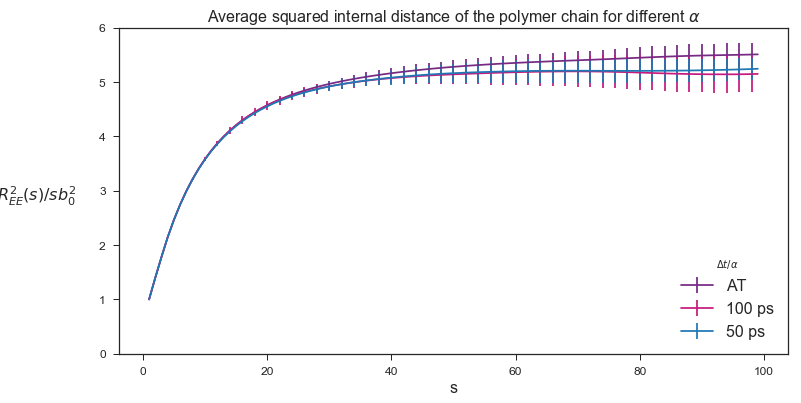

In [68]:
for r in internal:
    lbl = r if r == 'AT' else '{} ps'.format(int(dt/r))
    color = plot_colors[res2color['aa']] if r == 'AT' else plot_colors[res2color[r]]
    marker = res2marker[r]
    plt.errorbar(range(0, 100), avg_internal[r], std_internal[r], capthick=1.5, errorevery=2,
                 label=lbl, color=color, linestyle='-')
plt.title(r'Average squared internal distance of the polymer chain for different $\alpha$')
an_1 = plt.annotate(r'$R^2_{EE}(s) / sb_0^2$', xy=(-0.004, 0.5), xycoords='figure fraction', fontsize=fonttitle)
plt.xlabel('s')
plt.ylim([0, 6.0])
plt.legend(loc=0, title=r'$\Delta t / \alpha$')
plt.savefig('pe4_int.pdf', dpi=200, bbox_extra_artists=[an_1], bbox_inches='tight')

## Combine

In [215]:
avg_internal[r][99]

5.5086033635619858

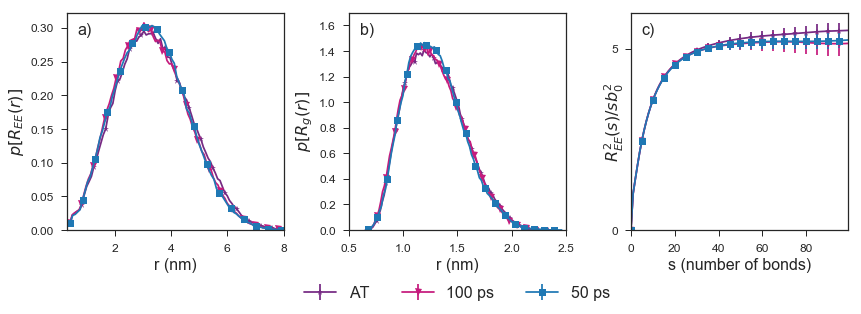

In [91]:
rcParams['figure.figsize'] = 14, 4
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(1, 3)
gs1.update(wspace=0.3, hspace=0.0)
ax1 = fig.add_subplot(gs1[0, 0]) # ee
ax2 = fig.add_subplot(gs1[0, 1]) # rg
ax3 = fig.add_subplot(gs1[0, 2]) # int

# Plot E-E
an_11 = ax1.annotate('a)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)

n, x = np.histogram(np.array([x for v in e_e['AT'] for x in v]), bins=100, density=True)
ax1.plot(x[1:], n, '-*', color=plot_colors[res2color['aa']], label='AT', markevery=5)
n, x = np.histogram(np.array([x for v in e_e[0.00001] for x in v]), bins=100, density=True)
ax1.plot(x[1:], n, '-bv', color=plot_colors[res2color[0.00001]], label='100 ps', markevery=5)
n, x = np.histogram(np.array([x for v in e_e[0.00002] for x in v]), bins=100, density=True)
ax1.plot(x[1:], n, '-gs', color=plot_colors[res2color[0.00002]], label='50 ps', markevery=5)
ax1.set_xlim([0.3, 8.0])
ax1.set_ylim(ymin=0)
# ax1.set_xticks([np.average(avg_ee)])
# ax1.set_yticks([0])
ax1.set_xlabel(r'r (nm)')
ax1.set_ylabel(r'$p[R_{EE}(r)]$')

# Plot Rg
an_21 = ax2.annotate('b)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
n, x = np.histogram(np.array([x for v in rg['AT'] for x in v]), bins=100, density=True)
ax2.plot(x[1:], n, '-r*', color=plot_colors[res2color['aa']], label='AT', markevery=5)
n, x = np.histogram(np.array([x for v in rg[0.00001] for x in v]), bins=100, density=True)
ax2.plot(x[1:], n, '-bv', color=plot_colors[res2color[0.00001]], label='100 ps', markevery=5)
n, x = np.histogram(np.array([x for v in rg[0.00002] for x in v]), bins=100, density=True)
ax2.plot(x[1:], n, '-gs', color=plot_colors[res2color[0.00002]], label='50 ps', markevery=5)
ax2.set_xlim([0.5, 2.5])
# ax2.set_xticks([np.average(avg_rg)])
# ax2.set_yticks([0])
ax2.set_ylim([0, 1.7])
ax2.set_ylabel(r'$p[R_g(r)]$')
ax2.set_xlabel(r'r (nm)')

# Plot Internal distance
for r in internal:
    lbl = r if r == 'AT' else '{} ps'.format(int(dt/r))
    color = plot_colors[res2color['aa']] if r == 'AT' else plot_colors[res2color[r]]
    marker = res2marker[r]
    avg_internal[r][0] = 0 # of course for s=, distance is 0 ;-)
    ax3.errorbar(range(0, 100), 
                 avg_internal[r], 
                 std_internal[r],
                 marker=marker, linestyle='-', 
                 label=lbl, color=color, markevery=5,
                 errorevery=5, capthick=1.5)
    ax3.set_ylim([0, 6.0])
an_31 = ax3.annotate('c)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax3.set_yticks([0, 5.0])
ax3.set_ylabel(r'$R^2_{EE}(s) / sb_0^2$')
ax3.set_xlabel(r's (number of bonds)')
ax3.set_ylim([0, 6.0])
ax3.set_xlim(0, 99)
ax3.set_ylabel(r'$R^2_{EE}(s) / sb_0^2$', labelpad=-15)

lgd = ax3.legend(bbox_to_anchor=(-0.8, -0.39), ncol=5, loc='lower center', frameon=False)

plt.savefig('pe4_ee_rg_int.pdf', dpi=300, bbox_inches='tight', bbox_extra_artists=[lgd, an_11, an_21, an_31])
# plt.savefig('pe4_ee_rg_int.png', dpi=300, bbox_inches='tight', bbox_extra_artists=[lgd, an_11, an_21, an_31])

# MSD and ACF

In [79]:
msd_data_ref = [np.loadtxt(os.path.join('dynamical_data', f)) 
                for f in os.listdir('dynamical_data') if 'msd' in f and 'ref' in f]
msd_data_t1 = [np.loadtxt(os.path.join('dynamical_data', f)) 
               for f in os.listdir('dynamical_data') if 'msd' in f and 'test_1' in f]
msd_data_t2 = [np.loadtxt(os.path.join('dynamical_data', f)) 
               for f in os.listdir('dynamical_data') if 'msd' in f and 'test_2' in f]
acf_data_ref = [np.loadtxt(os.path.join('dynamical_data_2', f)) 
                for f in os.listdir('dynamical_data_2') if 'ref' in f]
acf_data_t1 = [np.loadtxt(os.path.join('dynamical_data_2', f)) 
               for f in os.listdir('dynamical_data_2') if 'acf' in f and 'test_1' in f]
acf_data_t2 = [np.loadtxt(os.path.join('dynamical_data_2', f))
               for f in os.listdir('dynamical_data_2') if 'acf' in f and 'test_2' in f]
acf_data = {
    'aa': acf_data_ref,
    100.0: acf_data_t1,
    50.0: acf_data_t2
}


In [80]:
avg_msd_data_t1 = np.average(msd_data_t1, axis=0)
sem_msd_data_t1 = np.sqrt(np.average(np.array(msd_data_t1)[:,:, 2]**2, axis=0))
avg_msd_data_t2 = np.average(msd_data_t2, axis=0)
sem_msd_data_t2 = np.sqrt(np.average(np.array(msd_data_t2)[:,:, 2]**2, axis=0))
avg_msd_data_ref = np.average(msd_data_ref, axis=0)
sem_msd_data_ref = np.sqrt(np.average(np.array(msd_data_ref)[:,:, 2]**2, axis=0))

<Container object of 3 artists>

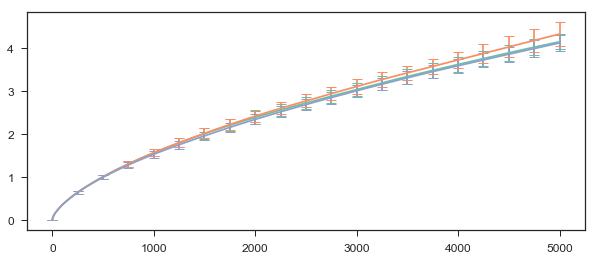

In [81]:
plt.errorbar(avg_msd_data_t1[:, 0], 
             avg_msd_data_t1[:, 1], 
             sem_msd_data_t1, 
             errorevery=50, 
             capthick=1,
             capsize=5)
plt.errorbar(avg_msd_data_t2[:, 0], 
             avg_msd_data_t2[:, 1], 
             sem_msd_data_t2, 
             errorevery=50, 
             capthick=1,
             capsize=5)
plt.errorbar(avg_msd_data_ref[:, 0], 
             avg_msd_data_ref[:, 1], 
             sem_msd_data_ref, 
             errorevery=50, 
             capthick=1,
             capsize=5)

In [82]:
avg_acf_data_t1 = np.average(acf_data_t1, axis=0)
sem_acf_data_t1 = np.sqrt(np.average(np.array(acf_data_t1)[:,:, 2]**2, axis=0)) #/np.sqrt(len(acf_data_t1))
avg_acf_data_t2 = np.average(acf_data_t2, axis=0)
sem_acf_data_t2 = np.sqrt(np.average(np.array(acf_data_t2)[:,:, 2]**2, axis=0)) #/np.sqrt(len(acf_data_t2))
avg_acf_data_ref = np.average(acf_data_ref, axis=0)
sem_acf_data_ref = np.sqrt(np.average(np.array(acf_data_ref)[:,:, 2]**2, axis=0)) #/np.sqrt(len(acf_data_ref))

avg_acf_data = {
    'aa': avg_acf_data_ref,
    100.0: avg_acf_data_t1,
    50.0: avg_acf_data_t2
}
std_acf_data = {
    'aa': sem_acf_data_ref,
    100.0: sem_acf_data_t1,
    50.0: sem_acf_data_t2
}

<Container object of 3 artists>

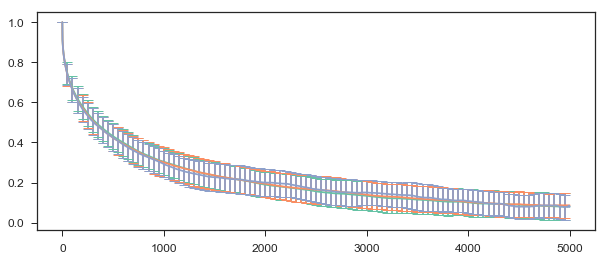

In [83]:
plt.errorbar(avg_acf_data_t1[:, 0], 
             avg_acf_data_t1[:, 1], 
             sem_acf_data_t1, 
             errorevery=50, 
             capthick=1,
             capsize=5)
plt.errorbar(avg_acf_data_t2[:, 0], 
             avg_acf_data_t2[:, 1], 
             sem_acf_data_t2, 
             errorevery=50, 
             capthick=1,
             capsize=5)
plt.errorbar(avg_acf_data_ref[:, 0], 
             avg_acf_data_ref[:, 1], 
             sem_acf_data_ref, 
             errorevery=50, 
             capthick=1,
             capsize=5)

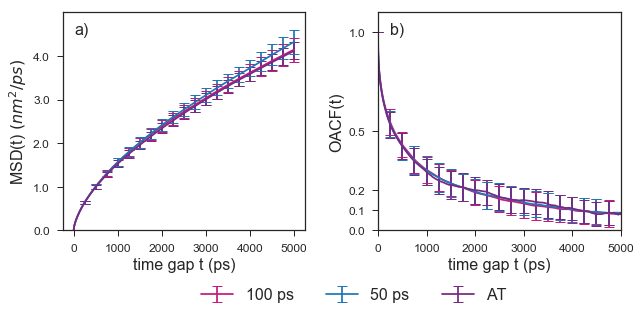

In [85]:
rcParams['figure.figsize'] = 10, 4
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.3, hspace=0.0)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])

an_1 = ax1.annotate(r'a)', xy=(0.05, 0.9),  xycoords='axes fraction', fontsize=fonttitle)
ax1.errorbar(avg_msd_data_t1[:, 0], 
             avg_msd_data_t1[:, 1], 
             sem_msd_data_t2, 
             errorevery=50, 
             capthick=1,
             capsize=5, label='100 ps', color=plot_colors[res2color[0.00001]])
ax1.errorbar(avg_msd_data_t2[:, 0], 
             avg_msd_data_t2[:, 1], 
             sem_msd_data_t2, 
             errorevery=50, 
             capthick=1,
             capsize=5, label='50 ps', color=plot_colors[res2color[0.00002]])
ax1.errorbar(avg_msd_data_ref[:, 0], 
             avg_msd_data_ref[:, 1], 
             sem_msd_data_ref, 
             errorevery=50, 
             capthick=1,
             capsize=5, label='AT', color=plot_colors[res2color['aa']])

ax1.set_ylim(ymax=5.5)
ax1.set_yticks([0.0, 1.0, 2.0, 3.0, 4.0])
ax1.set_yticklabels(map('{:.1f}'.format, ax1.get_yticks()))
ax1.set_ylim([0.01, 5.0])
ax1.set_xlabel(r'time gap t (ps)')
ax1.set_ylabel(r'MSD(t) $(nm^2 / ps)$')

# ACF
an_2 = ax2.annotate(r'b)', xy=(0.05, 0.9),  xycoords='axes fraction', fontsize=fonttitle)
ax2.errorbar(avg_acf_data_t1[:, 0], 
             avg_acf_data_t1[:, 1], 
             sem_acf_data_t1, 
             errorevery=250,
             capthick=1,
             capsize=5, 
             label='100 ps', color=plot_colors[res2color[0.00001]])
ax2.errorbar(avg_acf_data_t2[:, 0], 
             avg_acf_data_t2[:, 1], 
             sem_acf_data_t2, 
             errorevery=250,
             capthick=1,
             capsize=5, color=plot_colors[res2color[0.00002]], label='50 ps')
ax2.errorbar(avg_acf_data_ref[:, 0], 
             avg_acf_data_ref[:, 1],
             sem_acf_data_ref, 
             errorevery=250, 
             capthick=1,
             capsize=5, color=plot_colors[res2color['aa']], label='AT')
ax2.set_xlabel(r'time gap t (ps)')
ax2.set_ylabel('OACF(t)')
ax2.set_ylim([0.0, 1.1])
ax2.set_xlim([0, 5000])
ax2.set_yticks([0.0, 0.1, 0.2, 0.5, 1.0])

lgd = ax2.legend(bbox_to_anchor=(-0.1, -0.4), ncol=5, loc='lower center', frameon=False)
plt.savefig('pe4_dynamical.pdf', dpi=300, bbox_extra_artists=[lgd, an_1, an_2], bbox_inches='tight')
# plt.savefig('pe4_dynamical.png', dpi=300, bbox_extra_artists=[lgd, an_1, an_2], bbox_inches='tight')

Diffusion coefficient in region 2000-5000 ps
  Ref    D=0.0992 +/- 0.0012 nm^2/ns
  100 ps D=0.098 +/- 0.0010 nm^2/ns
   50 ps D=0.106 +/- 0.0010 nm^2/ns


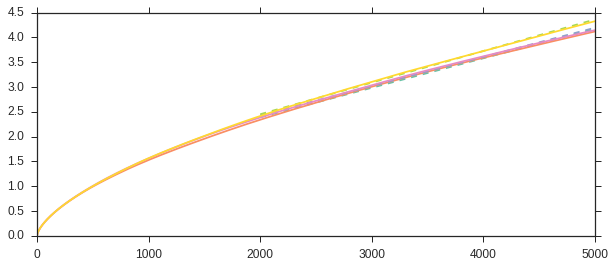

In [223]:
print('Diffusion coefficient in region 2000-5000 ps')
start_fit, stop_fit = 400, 1000
(ref_slope, ref_b), ref_cov = numpy.polyfit(
    avg_msd_data_ref[:, 0][start_fit:stop_fit],
    avg_msd_data_ref[:, 1][start_fit:stop_fit],
    1,
    w=1.0/sem_msd_data_ref[start_fit:stop_fit],
    cov=True
)
err_slope = np.sqrt(ref_cov[0][0])
print '{:>5}    D={:.4f} +/- {:.4f} nm^2/ns'.format('Ref', (ref_slope/6.0)*1000.0, err_slope*1000.0)

model = ref_b + ref_slope*avg_msd_data_ref[:, 0][start_fit:stop_fit]
plt.plot(avg_msd_data_ref[:, 0][start_fit:stop_fit], model,"--",label="model")
plt.plot(avg_msd_data_ref[:, 0], avg_msd_data_ref[:, 1], label='model-r')

# 100 ps
(d_slope, d_b), d_cov = numpy.polyfit(
    avg_msd_data_t1[:, 0][start_fit:stop_fit], 
    avg_msd_data_t1[:, 1][start_fit:stop_fit], 
    1,
    w=1.0/sem_msd_data_t1[start_fit:stop_fit],
    cov=True)
err_slope = np.sqrt(d_cov[0][0])
print '{:5.0f} ps D={:.3f} +/- {:.4f} nm^2/ns'.format(100, (d_slope/6.0)*1000.0, err_slope*1000.0)
model = d_b + d_slope*avg_msd_data_t1[:, 0][start_fit:stop_fit]
plt.plot(avg_msd_data_t1[:, 0][start_fit:stop_fit], model,"--",label="model")
plt.plot(avg_msd_data_t1[:, 0], avg_msd_data_t1[:, 1], label='model-r')

# 50 ps
(d_slope, d_b), (err_slope, err_b) = numpy.polyfit(
    avg_msd_data_t2[:, 0][start_fit:stop_fit], 
    avg_msd_data_t2[:, 1][start_fit:stop_fit], 
    1,
    w=1.0/sem_msd_data_t2[start_fit:stop_fit],
    cov=True)
err_slope = np.sqrt(d_cov[0][0])
print '{:5.0f} ps D={:.3f} +/- {:.4f} nm^2/ns'.format(50, (d_slope/6.0)*1000.0, err_slope*1000.0)
model = d_b + d_slope*avg_msd_data_t2[:, 0][start_fit:stop_fit]
plt.plot(avg_msd_data_t2[:, 0][start_fit:stop_fit], model,"--",label="model")
plt.plot(avg_msd_data_t2[:, 0], avg_msd_data_t2[:, 1], label='model-r')


# ACF

In [224]:
start_fit, stop_fit = 1000, 5000
d_slopes = defaultdict(list)
for r in acf_data:
    for ar in acf_data[r]:
        x = ar[:, 0][start_fit:stop_fit]
        y = np.log(ar[:, 1][start_fit:stop_fit])
        (d_slope, d_b, _, _, err_slope) = scipy.stats.linregress(x, y)
        d_slopes[r].append(-1.0/d_slope/1000.0)
        model = d_b + d_slope*x
        #plt.plot(x, y)
        #plt.plot(x, model)
for r in d_slopes:
    print('{} {:.4f} {:.4f}'.format(
            r if r == 'aa' else dt/r, 
            np.average(d_slopes[r]), 
            np.std(d_slopes[r])))

aa 3.1315 0.0493
2e-05 3.1750 0.3082
1e-05 3.0915 0.6150


     aa: 3.3601 +/- 0.00100 ns
   50.0: 3.2955 +/- 0.00100 ns
  100.0: 3.1217 +/- 0.00100 ns


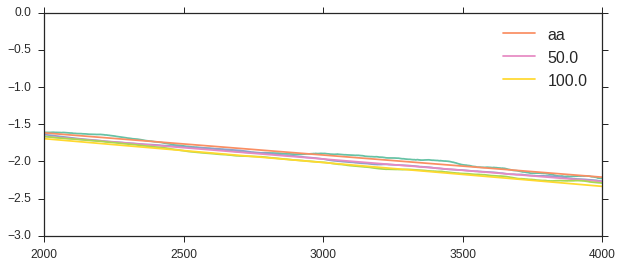

In [225]:
start_fit, stop_fit = 2000, 4000
d_slopes = defaultdict(list)
d_bs = defaultdict(list)
for r in acf_data:
    for ar in acf_data[r]:
        (ref_slope, ref_b), ref_cov = numpy.polyfit(
            ar[:, 0][start_fit:stop_fit],
            np.log(ar[:, 1][start_fit:stop_fit]),
            1,
            w=np.log(ar[:, 2][start_fit:stop_fit]),
            cov=True
        )       
        d_slopes[r].append(ref_slope)
        d_bs[r].append(ref_b)

plt.xlim([start_fit, stop_fit])
for r in d_slopes:
    plt.plot(avg_acf_data[r][:, 0], np.log(avg_acf_data[r][:, 1]))
    model = np.average(d_bs[r]) + np.average(d_slopes[r])*avg_acf_data[r][:, 0]
    plt.plot(avg_acf_data[r][:, 0], model, label=r)
    print '{:>7}: {:.4f} +/- {:.5f} ns'.format(r, 
                                               (-1.0/np.average(d_slopes[r]))/1000.0, 
                                               np.exp(np.std(d_slopes[r]))/1000.0)
plt.legend()

In [226]:
aa_t = ref_acf[:, 0]
aa_acf = np.log(ref_acf[:, 1])
plt.plot(aa_t, aa_acf)

start_fit, stop_fit = 0, 5000
(ref_slope, ref_b), (err_slope, err_b) = poly_lsq(aa_t[start_fit:stop_fit], aa_acf[start_fit:stop_fit], 1)
model = ref_b + ref_slope*aa_t
plt.plot(aa_t, model)
plt.ylabel('ln C(t)')
plt.xlabel('t (ns)')
print ref_slope, ref_b, err_slope, err_b
tau_d = -1/ref_slope
print tau_d
print 'A0', np.exp(ref_b)

NameError: name 'ref_acf' is not defined

# Volumetric density

In [ ]:
ref_densities = np.array([491.665234565,491.540536654,491.51060848,491.581882279,491.457680435])*1.6605402
print('Avg ref density = {}'.format(np.average(ref_densities)))
print('Std ref density = {}'.format(np.std(ref_densities, ddof=1)))

In [ ]:
res_densities = {
    'test_1': np.array([map(float, '491.614721655 491.6051806 491.647251016 491.632504183 491.503530767'.split())])*1.6605402,
    'test_2': np.array([map(float, '491.52397305 491.522333983 491.379270025 491.450660257 491.560483443'.split())])*1.6605402
}
avg_res_densities = {k: np.average(v) for k, v in res_densities.iteritems()}
std_res_densities = {k: np.std(v) for k, v in res_densities.iteritems()}
for r in sorted(avg_res_densities):
    v = avg_res_densities[r]
    print('res {}: rho={} Std={}'.format(r, v, std_res_densities[r]))

## Block average

In [ ]:
test2res = {'test_1': 1e-5, 'test_2': 2*1e-5}
volume_files = {f: np.loadtxt(os.path.join('density_data/', f)) for f in os.listdir('density_data/')}
group_volume_files = defaultdict(list)
for f, d in volume_files.iteritems():
    t = 'AT' if 'ref' in f else test2res['_'.join(f.split('_')[:2])]
    group_volume_files[t].append(d)

In [ ]:
block_size = 60

In [ ]:
105353.69999999995*1.6605402/217

In [ ]:
mass_tot = 105353.69999999995*1.6605402  # Total mass converted to kg/mol
avg_group_density = {}
std_group_density = {}
for f in group_volume_files:
    d = np.array([x for xf in group_volume_files[f] for x in xf])
    avg_group_density[f] = mass_tot/np.average(d)
    vrs = []
    for d in group_volume_files[f]:
        var = np.var(d) / float((d.shape[0]/block_size))
        vrs.append(var)
    std_group_density[f] = np.sqrt(np.average(vrs))

In [ ]:
for v, d in avg_group_density.items():
    print '{} {:.2f} {:.2f}'.format(v, d, std_group_density[v])
    plt.errorbar(1, d, std_group_density[v], markeredgewidth=5.0, capthick=5.0, markersize=5.0, label=v)
plt.xlim([0.98, 1.02])
plt.legend()

# Plots for poster SimForum

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
sns.set(style='ticks', palette='muted')

fonttitle=20
fontother=16

rcParams.update({'font.size': fontother, 
                 'legend.fontsize': fontother, 
                 'axes.titlesize': fonttitle,
                 'axes.labelsize': fonttitle,
                 'xtick.labelsize': fontother, 
                 'ytick.labelsize': fontother,
                 })

rcParams['figure.figsize'] = 18, 9
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(3, 3, width_ratios=[2,1.5,0.5])
gs1.update(wspace=0.1, hspace=0.4)
ax1 = fig.add_subplot(gs1[0:2,0:1])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1, 1:3])
ax4 = fig.add_subplot(gs1[2, 0:1])
ax5 = fig.add_subplot(gs1[2, 1:3])

# Potential energy
ax1.annotate('kJ/mol/N', xy=(-0.03, 1.02),  xycoords='axes fraction',horizontalalignment='right')

ax1.axvline(x=5.0, linewidth=0.5, linestyle='--')
ax1.plot(res_time[1e-05], res_epot[1e-05]/7500.0, label='100 ps', color=plot_colors[res2color[0.00001]])
ax1.plot(res_time[2e-05], res_epot[2e-05]/7500.0, label='50 ps', color=plot_colors[res2color[0.00002]])
ax1.plot(ref_data[:, 1], ref_epot/7500.0, label='AT', color=plot_colors[res2color['aa']])
ax1.set_title('Change in total potential energy during backmapping')
#ax1.set_xlabel('simulation time (ps)')
#ax1.legend(loc=0)
ax1.set_ylim([7, 13.5])
ax1.set_xticks([0, 5, 55, 105, 120])
ax1.set_xticklabels([0, 5, 55, 105, '120 ps'])
ax1.set_xlim([0, 120])

# RDF
ax2.plot(res_rdf1[:, 0], res_rdf1[:, 1], label='100 ps', color=plot_colors[res2color[0.00001]])
ax2.plot(res_rdf2[:, 0], res_rdf2[:, 1], label='50 ps', color=plot_colors[res2color[0.00002]])
ax2.plot(ref_rdf[:, 0], ref_rdf[:, 1], 'o', label='AT', color=plot_colors[res2color['aa']])
ax2.set_xlim([0.3, 1.4])
ax2.set_yticks([1.0])
ax2.set_title('Radial distribution function')
ax2.set_xticks([0.4, 1.4])
ax2.set_xticklabels(['0.4', '1.4 nm'])

# Bonds
ax3.plot(res_bonds1[:, 0], res_bonds1[:, 1], label='100 ps', color=plot_colors[res2color[0.00001]])
ax3.plot(res_bonds2[:, 0], res_bonds2[:, 1], label='50 ps', color=plot_colors[res2color[0.00002]])
ax3.plot(ref_bonds[:, 0], ref_bonds[:, 1], 'o', label='AT', color=plot_colors[res2color['aa']])
ax3.set_yticks([])
ax3.set_xlim([0.140, 0.166])
ax3.set_title('Bond length distribution')
ax3.set_xticks([0.154])
ax3.set_xticklabels(['0.154 nm'])

# Angles
ax4.plot(res_angles1[:, 0], res_angles1[:, 1], label='100 ps', color=plot_colors[res2color[0.00001]])
ax4.plot(res_angles2[:, 0], res_angles2[:, 1], label='50 ps', color=plot_colors[res2color[0.00002]])
ax4.plot(ref_angles[:, 0], ref_angles[:, 1], 'o', label='AT', color=plot_colors[res2color['aa']])
ax4.set_yticks([])
ax4.set_title('Angle distribution')
ax4.set_xlim([98, 130])
ax4.set_xticks([114.0])
ax4.set_xticklabels([r'$114.0^\circ$'])

# Dihedrals
ax5.plot(res_dih1[:, 0], res_dih1[:, 1], label='100 ps', color=plot_colors[res2color[0.00001]])
ax5.plot(res_dih2[:, 0], res_dih2[:, 1], label='50 ps', color=plot_colors[res2color[0.00002]])
ax5.plot(ref_dih[:, 0], ref_dih[:, 1], 'o', label='AT', color=plot_colors[res2color['aa']])
ax5.set_yticks([])
ax5.set_title('Dihedral distribution')
ax5.set_xlim([-150, 150])
ax5.set_xticks([0.0])
ax5.set_xticklabels([r'$0.0^\circ$'])

lgd = ax5.legend(fontsize=fontother, bbox_to_anchor=(0.0, -0.6), ncol=4, loc='lower center', frameon=True)
plt.savefig('pe4-poster_plots.pdf', dpi=300, bbox_extra_artist=[lgd], bbox_inches = 'tight', pad_inches = 0)